In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<h1 style="color: #1f77b4;">🎬 VEATIC Dataset: Video-based Emotion and Affect Tracking in Context</h1>

---

<h2 style="color: #ff7f0e;">📊 Dataset Overview</h2>
The <strong>VEATIC</strong> dataset is designed to analyze emotions and affect in video content with <strong>contextual awareness</strong>. Key points:

- 🎥 <strong>Source</strong>: 124 video clips from Hollywood movies, documentaries, and home videos.
- 📝 <strong>Annotations</strong>: Continuous <span style="color: #2ca02c;">valence</span> and <span style="color: #d62728;">arousal</span> ratings per frame, focusing on the emotional state of the target character.
- 👁️ <strong>Focus</strong>: Captures <strong>facial expressions</strong>, <strong>body language</strong>, and <strong>scene context</strong> influencing emotional states.
- 💾 <strong>Format</strong>: Video files with frame-level annotations available for research purposes.

---

<h2 style="color: #2ca02c;">📝 What Are the Annotations?</h2>
The annotations are **numerical labels** that describe the emotional state of the target character in each frame:

- 💚 <strong>Valence</strong>: How pleasant or unpleasant the emotion is.
  - High valence → positive (e.g., happiness)
  - Low valence → negative (e.g., sadness, anger)
- 🔥 <strong>Arousal</strong>: How intense or calm the emotion is.
  - High arousal → excitement, anger, fear
  - Low arousal → calm, relaxation, boredom

<strong>Why they are important:</strong>
1. 🧠 Provide **ground truth labels** for training machine learning models.  
2. 📈 Enable **continuous emotion prediction** rather than fixed categories.  
3. 👁️ Help models learn the relationship between **body language, facial expression, and context**.  
4. 📊 Allow **quantitative evaluation** of models using metrics like MAE, CCC, or correlation.  
5. 🎨 Enable **visualization of emotional dynamics** over time for deeper insights.

Example of emotional trajectory:

| Time (s) | Valence | Arousal | Description |
|-----------|----------|---------|-------------|
| 0–5       | +0.6     | 0.2     | Calm, neutral mood |
| 6–15      | +0.3     | 0.5     | Tension rising |
| 16–25     | −0.4     | 0.8     | Anger or frustration |
| 26–30     | −0.2     | 0.6     | Still negative, calming down |

---

<h2 style="color: #d62728;">🎯 Project Objective</h2>
The main goals of this project are:

1. 🧠 **Analyze emotions and body language** of characters in videos using the VEATIC dataset.
2. 🔍 **Extract visual features** such as facial expressions, body movements, and contextual cues.
3. 🤖 **Model emotional states** using machine learning or deep learning techniques.
4. 📈 **Predict continuous affect** (valence and arousal) for each frame.
5. 💡 **Provide insights** into how context and body language contribute to emotional expression for applications in:
   - Affective computing
   - Human-computer interaction
   - Behavioral analysis

---

<h2 style="color: #9467bd;">🛠️ Usage</h2>
This dataset is particularly suited for:

- 🖼️ **Emotion recognition** considering **body language** and **contextual cues**.
- 📊 **Training and evaluating models** on **continuous emotion prediction** tasks.
- 💻 Integrating with computer vision pipelines using frameworks such as **OpenCV**, **PyTorch**, or **TensorFlow**.


Exploring the dataset

In [2]:
import os
import cv2
import pandas as pd
from collections import Counter

# ✅ Correct base path
base_path = "/content/drive/MyDrive/Colab Notebooks/dataVideo"

print("📂 Folders in dataVideo:")
for folder in os.listdir(base_path):
    print(" -", folder)

# === 1️⃣ Explore video files ===
video_dir = os.path.join(base_path, "videos")
if os.path.exists(video_dir):
    video_files = [f for f in os.listdir(video_dir) if f.endswith(('.mp4', '.avi', '.mov'))]
    print(f"\n🎥 Total videos found: {len(video_files)}")
    print("📜 Sample video files:", video_files[:5])

    # Display video properties
    print("\n🎞️ Video details:")
    for vf in video_files[:3]:  # analyze first 3 videos
        path = os.path.join(video_dir, vf)
        cap = cv2.VideoCapture(path)
        if not cap.isOpened():
            print(f"❌ Could not open {vf}")
            continue

        fps = cap.get(cv2.CAP_PROP_FPS)
        frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
        duration = frames / fps if fps > 0 else 0
        width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
        height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
        print(f" - {vf}: {width}x{height}, {fps:.1f} FPS, {frames} frames, {duration:.2f} sec")
        cap.release()

# === 2️⃣ Explore rating files ===
rating_dir = os.path.join(base_path, "rating_averaged")
if os.path.exists(rating_dir):
    rating_files = [f for f in os.listdir(rating_dir) if f.endswith(('.csv', '.json', '.txt'))]
    print(f"\n📝 Rating files found: {len(rating_files)}")
    print("📄 Sample annotation files:", rating_files[:5])

    # Try loading a sample CSV file
    sample_file = None
    for f in rating_files:
        if f.endswith(".csv"):
            sample_file = os.path.join(rating_dir, f)
            break

    if sample_file:
        print(f"\n🔍 Previewing annotations from: {os.path.basename(sample_file)}")
        df = pd.read_csv(sample_file)
        print("📑 Columns:", df.columns.tolist())
        print(df.head())

        # Basic summary
        if 'valence' in df.columns and 'arousal' in df.columns:
            print("\n📈 Annotation summary:")
            print(f"Valence range: {df['valence'].min():.2f} → {df['valence'].max():.2f}")
            print(f"Arousal range: {df['arousal'].min():.2f} → {df['arousal'].max():.2f}")
            print(f"Missing values: {df.isna().sum().to_dict()}")
        else:
            print("⚠️ Columns 'valence' and 'arousal' not found — check file structure.")

# === 3️⃣ Dataset overview ===
print("\n✅ Dataset summary:")
print(f"Videos folder: {video_dir}")
print(f"Ratings folder: {rating_dir}")
print(f"Number of videos: {len(video_files)}")
print(f"Number of rating files: {len(rating_files)}")


📂 Folders in dataVideo:
 - rating_averaged
 - videos

🎥 Total videos found: 124
📜 Sample video files: ['52.mp4', '20.mp4', '54.mp4', '19.mp4', '8.mp4']

🎞️ Video details:
 - 52.mp4: 854x480, 25.0 FPS, 264 frames, 10.56 sec
 - 20.mp4: 854x460, 25.0 FPS, 453 frames, 18.12 sec
❌ Could not open 54.mp4

📝 Rating files found: 248
📄 Sample annotation files: ['118_valence.csv', '115_arousal.csv', '102_valence.csv', '114_arousal.csv', '100_arousal.csv']

🔍 Previewing annotations from: 118_valence.csv
📑 Columns: ['0', '-0.03124999999999988']
   0  -0.03124999999999988
0  1             -0.063655
1  2             -0.045956
2  3             -0.019395
3  4             -0.015738
4  5             -0.031466
⚠️ Columns 'valence' and 'arousal' not found — check file structure.

✅ Dataset summary:
Videos folder: /content/drive/MyDrive/Colab Notebooks/dataVideo/videos
Ratings folder: /content/drive/MyDrive/Colab Notebooks/dataVideo/rating_averaged
Number of videos: 124
Number of rating files: 248


Align Videos with Emotion Ratings

In [3]:
import re

# Match video files to corresponding rating files
matches = []
for vid in video_files:
    vid_id = re.findall(r'\d+', vid)[0]  # extract number from filename
    for rate in rating_files:
        if vid_id in rate:
            matches.append((vid, rate))
            break

print(f"✅ Matched {len(matches)} video-rating pairs.")
print("📦 Sample matches:", matches[:5])


✅ Matched 124 video-rating pairs.
📦 Sample matches: [('52.mp4', '52_arousal.csv'), ('20.mp4', '120_arousal.csv'), ('54.mp4', '54_arousal.csv'), ('19.mp4', '119_arousal.csv'), ('8.mp4', '118_valence.csv')]


Extract Body Language Features

In [4]:
import os
import cv2
import pandas as pd
import numpy as np

# Pick one sample pair (video + rating)
sample_video, sample_rating = matches[0]
print(f"🎬 Selected video: {sample_video}")
print(f"🧠 Matched rating file: {sample_rating}")

video_path = os.path.join(video_dir, sample_video)
rating_path = os.path.join(rating_dir, sample_rating)

# Load the emotion annotation file
ratings = pd.read_csv(rating_path)
print("\n📊 Annotation columns:", ratings.columns.tolist())
print(ratings.head())

# Inspect video properties
cap = cv2.VideoCapture(video_path)
fps = cap.get(cv2.CAP_PROP_FPS)
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
duration = total_frames / fps if fps > 0 else 0

print(f"\n🎞️ Video details — {sample_video}")
print(f"Frames: {total_frames}, FPS: {fps:.1f}, Duration: {duration:.2f} sec")

# Select 5 evenly spaced frames
frame_indices = np.linspace(0, total_frames - 1, 5, dtype=int)
print("🧩 Frame indices to extract:", frame_indices)
cap.release()


🎬 Selected video: 52.mp4
🧠 Matched rating file: 52_arousal.csv

📊 Annotation columns: ['0', '0.012568215500490885']
   0  0.012568215500490885
0  1             -0.014127
1  2             -0.001268
2  3             -0.010029
3  4             -0.006445
4  5             -0.010460

🎞️ Video details — 52.mp4
Frames: 264, FPS: 25.0, Duration: 10.56 sec
🧩 Frame indices to extract: [  0  65 131 197 263]


In [7]:
!pip install mediapipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.1 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of opencv-contrib-python to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 31.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 101.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 26.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 MB 11.6 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.5
    Uninstalling protobuf-5.29.5:
      Successfully uninstalled protobuf-5.29.5
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 4.12.0.88
    Uninstalling open

Setup MediaPipe for Pose Detection

In [4]:
import mediapipe as mp

mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=True)

def extract_pose(frame):
    """Detect pose landmarks in a given frame."""
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = pose.process(rgb)
    return results


In [37]:
import pandas as pd
import os
import numpy as np

# === Debug: Let's see ALL files in rating_averaged ===
base_path = "/content/drive/MyDrive/Colab Notebooks/dataVideo"
ratings_path = f"{base_path}/rating_averaged"

print("📁 ALL files in rating_averaged folder:")
all_files = os.listdir(ratings_path)
print(f"Total files: {len(all_files)}")

# Separate valence and arousal files
valence_files = [f for f in all_files if 'valence' in f.lower()]
arousal_files = [f for f in all_files if 'arousal' in f.lower()]
other_files = [f for f in all_files if 'valence' not in f.lower() and 'arousal' not in f.lower()]

print(f"\n🎭 Valence files: {len(valence_files)}")
print(f"🎯 Arousal files: {len(arousal_files)}")
print(f"❓ Other files: {len(other_files)}")

# Show sample of each
print(f"\nSample valence files: {valence_files[:5]}")
print(f"Sample arousal files: {arousal_files[:5]}")
print(f"Sample other files: {other_files[:5]}")

# === Check if we have matching valence and arousal files ===
print(f"\n🔍 Checking for matching valence/arousal pairs:")

# Extract video IDs from arousal files we've been using
arousal_ids = set()
for file in arousal_files:
    vid_id = file.split('_')[0]
    arousal_ids.add(vid_id)

valence_ids = set()
for file in valence_files:
    vid_id = file.split('_')[0]
    valence_ids.add(vid_id)

print(f"Unique video IDs in arousal files: {len(arousal_ids)}")
print(f"Unique video IDs in valence files: {len(valence_ids)}")
print(f"Videos with both valence and arousal: {len(arousal_ids.intersection(valence_ids))}")

# === Analyze BOTH valence and arousal files for the same video ===
if valence_files:
    # Check a video that should have both
    test_video_id = "106"  # Using the same video from your example

    valence_file = None
    arousal_file = None

    for file in valence_files:
        if file.startswith(test_video_id + '_') or file.startswith(test_video_id + '.'):
            valence_file = file
            break

    for file in arousal_files:
        if file.startswith(test_video_id + '_') or file.startswith(test_video_id + '.'):
            arousal_file = file
            break

    print(f"\n📊 Analyzing video {test_video_id}:")
    print(f"Valence file: {valence_file}")
    print(f"Arousal file: {arousal_file}")

    if valence_file and arousal_file:
        # Load both files
        valence_path = os.path.join(ratings_path, valence_file)
        arousal_path = os.path.join(ratings_path, arousal_file)

        valence_df = pd.read_csv(valence_path)
        arousal_df = pd.read_csv(arousal_path)

        print(f"\n🎭 VALENCE data ({valence_file}):")
        print(f"Columns: {valence_df.columns.tolist()}")
        print(f"Shape: {valence_df.shape}")
        print("First 5 rows:")
        print(valence_df.head())

        print(f"\n🎯 AROUSAL data ({arousal_file}):")
        print(f"Columns: {arousal_df.columns.tolist()}")
        print(f"Shape: {arousal_df.shape}")
        print("First 5 rows:")
        print(arousal_df.head())

        # Check if they have same number of frames
        print(f"\n📈 Data alignment:")
        print(f"Valence frames: {len(valence_df)}")
        print(f"Arousal frames: {len(arousal_df)}")
        print(f"Match: {len(valence_df) == len(arousal_df)}")

# === If no valence files found, show what we actually have ===
if not valence_files:
    print(f"\n🚨 NO VALENCE FILES FOUND! Only arousal data available.")
    print(f"Let me check the actual content structure of arousal files:")

    for file in arousal_files[:3]:  # Check first 3 arousal files
        file_path = os.path.join(ratings_path, file)
        df = pd.read_csv(file_path)
        print(f"\n📋 File: {file}")
        print(f"Columns: {df.columns.tolist()}")
        print(f"First 3 rows:")
        for i in range(min(3, len(df))):
            print(f"  Row {i}: {df.iloc[i].values}")
        print(f"Data range: {df.iloc[:, 1].min():.3f} to {df.iloc[:, 1].max():.3f}")

📁 ALL files in rating_averaged folder:
Total files: 248

🎭 Valence files: 124
🎯 Arousal files: 124
❓ Other files: 0

Sample valence files: ['118_valence.csv', '102_valence.csv', '121_valence.csv', '110_valence.csv', '114_valence.csv']
Sample arousal files: ['115_arousal.csv', '114_arousal.csv', '100_arousal.csv', '116_arousal.csv', '104_arousal.csv']
Sample other files: []

🔍 Checking for matching valence/arousal pairs:
Unique video IDs in arousal files: 124
Unique video IDs in valence files: 124
Videos with both valence and arousal: 124

📊 Analyzing video 106:
Valence file: 106_valence.csv
Arousal file: 106_arousal.csv

🎭 VALENCE data (106_valence.csv):
Columns: ['0', '-0.03125000000000004']
Shape: (1815, 2)
First 5 rows:
   0  -0.03125000000000004
0  1             -0.073266
1  2             -0.044258
2  3             -0.011404
3  4             -0.016019
4  5             -0.039558

🎯 AROUSAL data (106_arousal.csv):
Columns: ['0', '-0.009374999999999984']
Shape: (1815, 2)
First 5 rows:

Visualize 5 Frames with Pose + Emotion Overlays

🎥 Found 124 videos
🎭 Found 124 valence files
🎯 Found 124 arousal files
✅ Matched 124 video-valence-arousal triplets.
📦 Sample matches: [('0.mp4', '0_valence.csv', '0_arousal.csv'), ('1.mp4', '1_valence.csv', '1_arousal.csv'), ('10.mp4', '10_valence.csv', '10_arousal.csv')]

🎬 Using video: 114.mp4
🎭 Using valence file: 114_valence.csv
🎯 Using arousal file: 114_arousal.csv

📊 Valence data columns: ['0', '2.3474799114243476e-16']
📈 Arousal data columns: ['0', '-3.4272677399036416e-17']

✅ Cleaned data shape: (2086, 2)
First 10 rows of CLEANED emotion data:
    valence   arousal
0  0.041405  0.014744
1  0.018715  0.006679
2 -0.015512 -0.005556
3 -0.020047 -0.007233
4  0.000570  0.000209
5  0.014771  0.005777
6  0.005979  0.003793
7 -0.012004 -0.000791
8 -0.017685 -0.000656
9 -0.008854  0.004288

📊 Data ranges:
Valence: [-0.489, 0.041]
Arousal: [-0.116, 0.305]

🎥 Total frames in video: 2087
📊 Total emotion ratings available: 2086
🎯 Randomly selected frames: [571, 1010, 1076, 1084, 1754]

📊 

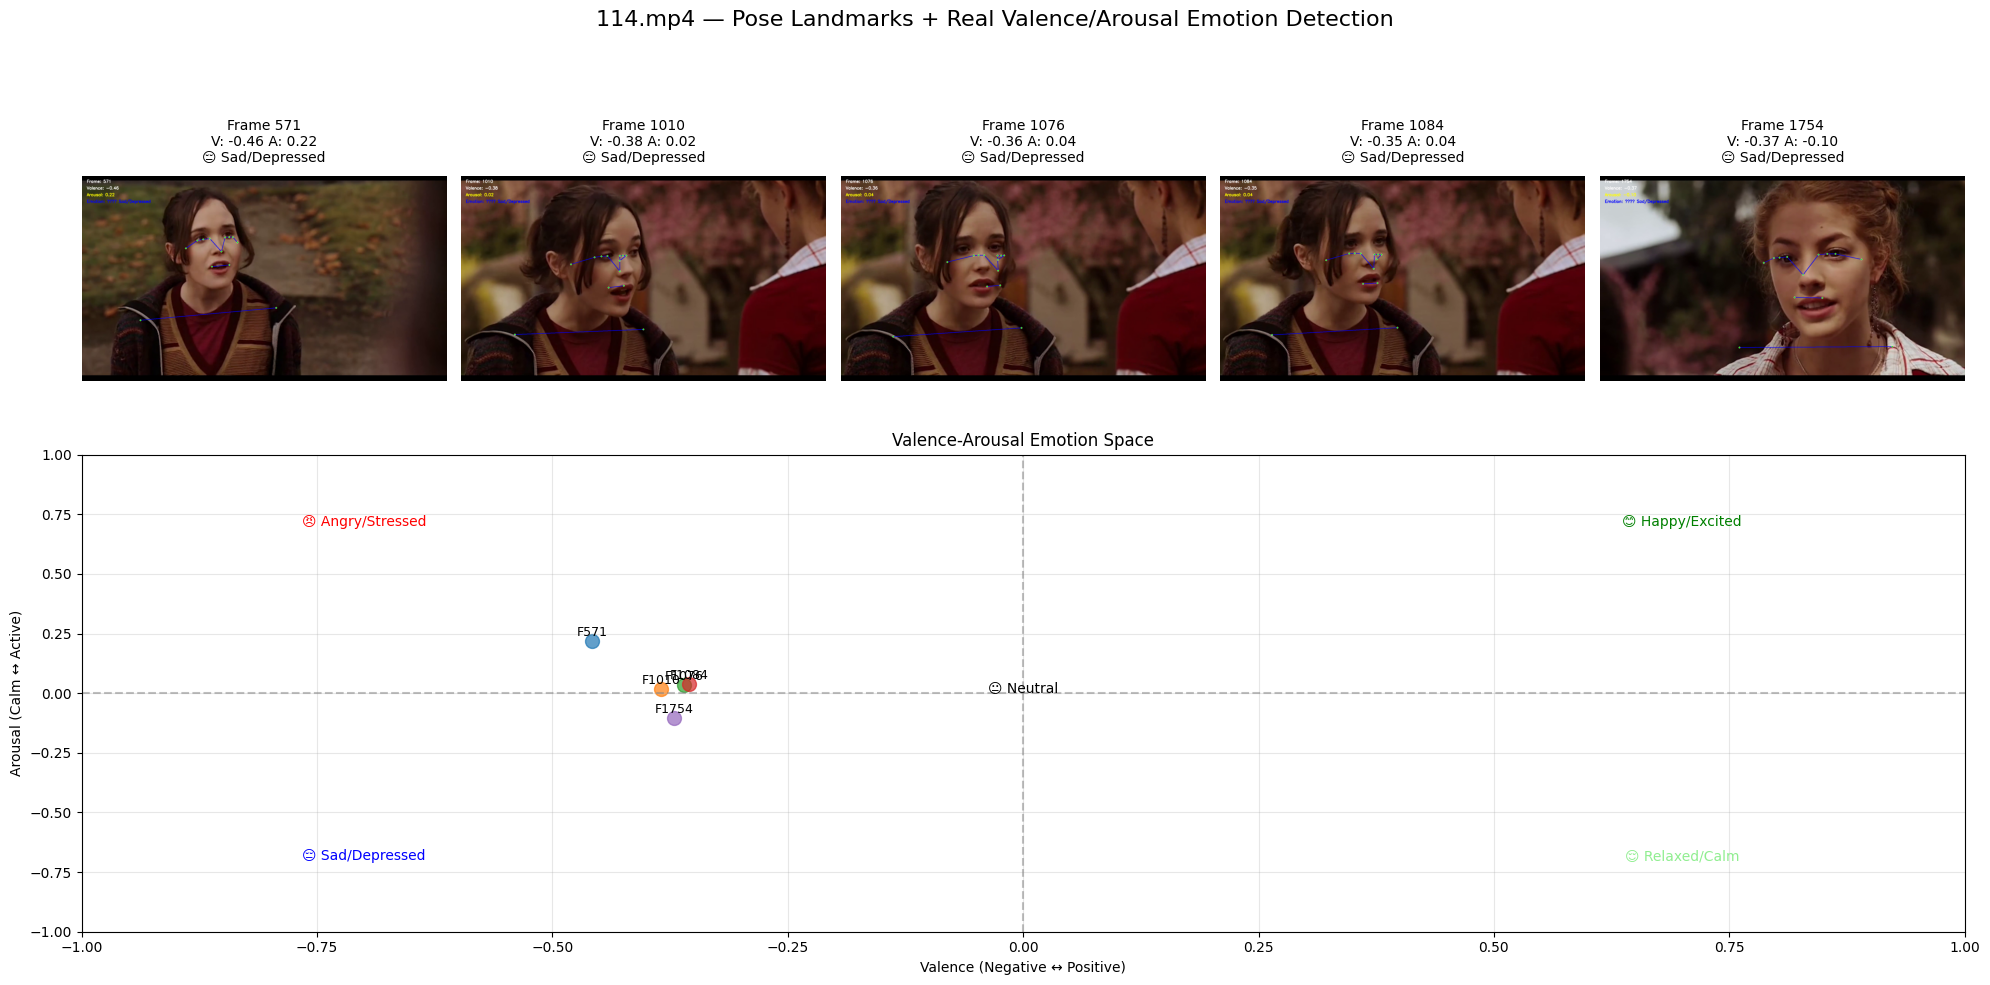


📈 Emotion Distribution in sampled frames:
  😔 Sad/Depressed: 5 frame(s)

🎯 Dataset Statistics:
Total frames with emotion data: 2086
Valence range: [-0.489, 0.041]
Arousal range: [-0.116, 0.305]
Average valence: -0.368
Average arousal: 0.043


In [38]:
import os
import re
import cv2
import random
import matplotlib.pyplot as plt
import mediapipe as mp
import pandas as pd
import numpy as np

# === Base paths ===
base_path = "/content/drive/MyDrive/Colab Notebooks/dataVideo"
videos_path = f"{base_path}/videos"
ratings_path = f"{base_path}/rating_averaged"

# === List all video and rating files ===
video_files = sorted([f for f in os.listdir(videos_path) if f.endswith(".mp4")])
valence_files = sorted([f for f in os.listdir(ratings_path) if 'valence' in f])
arousal_files = sorted([f for f in os.listdir(ratings_path) if 'arousal' in f])

print(f"🎥 Found {len(video_files)} videos")
print(f"🎭 Found {len(valence_files)} valence files")
print(f"🎯 Found {len(arousal_files)} arousal files")

# === Match video files to corresponding valence and arousal files ===
matches = []
for vid in video_files:
    vid_id = re.findall(r'\d+', vid)[0]  # extract number from filename

    valence_file = None
    arousal_file = None

    # Find matching valence file
    for v_file in valence_files:
        if vid_id == v_file.split('_')[0]:
            valence_file = v_file
            break

    # Find matching arousal file
    for a_file in arousal_files:
        if vid_id == a_file.split('_')[0]:
            arousal_file = a_file
            break

    if valence_file and arousal_file:
        matches.append((vid, valence_file, arousal_file))

print(f"✅ Matched {len(matches)} video-valence-arousal triplets.")
print("📦 Sample matches:", matches[:3])

# === Initialize Mediapipe Pose ===
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils
pose = mp_pose.Pose(static_image_mode=False, min_detection_confidence=0.5)

# === Function to determine emotion from valence/arousal ===
def get_emotion(valence, arousal):
    """
    Determine emotion quadrant based on valence/arousal values
    High Arousal + High Valence = Excited/Happy
    High Arousal + Low Valence = Angry/Stressed
    Low Arousal + High Valence = Relaxed/Content
    Low Arousal + Low Valence = Sad/Bored
    """
    if valence > 0.3 and arousal > 0.3:
        return "😊 Happy/Excited", (0, 255, 0)  # Green
    elif valence > 0.3 and arousal <= 0.3:
        return "😌 Relaxed/Calm", (100, 255, 100)  # Light Green
    elif valence <= 0.3 and arousal > 0.3:
        return "😠 Angry/Stressed", (0, 0, 255)  # Red
    elif valence <= -0.3 and arousal <= 0.3:
        return "😔 Sad/Depressed", (255, 0, 0)  # Blue
    elif valence <= 0.3 and arousal <= 0.3:
        return "😐 Neutral/Bored", (255, 255, 255)  # White
    else:
        return "🎭 Mixed", (255, 255, 0)  # Yellow

# === Randomly choose a video-valence-arousal triplet ===
selected_triplet = random.choice(matches)
video_file, valence_file, arousal_file = selected_triplet

video_path = os.path.join(videos_path, video_file)
valence_path = os.path.join(ratings_path, valence_file)
arousal_path = os.path.join(ratings_path, arousal_file)

print(f"\n🎬 Using video: {video_file}")
print(f"🎭 Using valence file: {valence_file}")
print(f"🎯 Using arousal file: {arousal_file}")

# === Load BOTH valence and arousal data ===
valence_df = pd.read_csv(valence_path)
arousal_df = pd.read_csv(arousal_path)

print(f"\n📊 Valence data columns: {valence_df.columns.tolist()}")
print(f"📈 Arousal data columns: {arousal_df.columns.tolist()}")

# Extract the actual emotion data (second column from both files)
valence_data = valence_df.iloc[:, 1]  # Second column contains valence values
arousal_data = arousal_df.iloc[:, 1]  # Second column contains arousal values

# Create clean dataframe with proper column names
ratings_clean = pd.DataFrame({
    'valence': valence_data,
    'arousal': arousal_data
})

print(f"\n✅ Cleaned data shape: {ratings_clean.shape}")
print("First 10 rows of CLEANED emotion data:")
print(ratings_clean.head(10))
print(f"\n📊 Data ranges:")
print(f"Valence: [{ratings_clean['valence'].min():.3f}, {ratings_clean['valence'].max():.3f}]")
print(f"Arousal: [{ratings_clean['arousal'].min():.3f}, {ratings_clean['arousal'].max():.3f}]")

# === Open video ===
cap = cv2.VideoCapture(video_path)
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print(f"\n🎥 Total frames in video: {total_frames}")
print(f"📊 Total emotion ratings available: {len(ratings_clean)}")

# === Random frame sampling ===
valid_frames = min(total_frames, len(ratings_clean))
frame_indices = sorted(random.sample(range(valid_frames), 5))
print(f"🎯 Randomly selected frames: {frame_indices}")

# === Function to extract pose landmarks ===
def extract_pose(frame):
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    return pose.process(rgb)

# === Process and visualize ===
sample_frames = []
frame_data = []

frame_no = 0

while True:
    ret, frame = cap.read()
    if not ret:
        break

    if frame_no in frame_indices:
        results = extract_pose(frame)

        if results.pose_landmarks:
            mp_drawing.draw_landmarks(
                frame, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                mp_drawing.DrawingSpec(color=(0,255,0), thickness=2, circle_radius=2),
                mp_drawing.DrawingSpec(color=(255,0,0), thickness=2, circle_radius=2)
            )

        # Retrieve REAL valence and arousal data
        val = ratings_clean.loc[frame_no, 'valence']
        aro = ratings_clean.loc[frame_no, 'arousal']

        # Get emotion label and color
        emotion, color = get_emotion(val, aro)

        # Add text overlays
        y_offset = 40
        line_height = 35

        cv2.putText(frame, f"Frame: {frame_no}", (25, y_offset),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255,255,255), 2)
        cv2.putText(frame, f"Valence: {val:.2f}", (25, y_offset + line_height),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255,255,255), 2)
        cv2.putText(frame, f"Arousal: {aro:.2f}", (25, y_offset + line_height*2),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,255,255), 2)
        cv2.putText(frame, f"Emotion: {emotion}", (25, y_offset + line_height*3),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, color, 2)

        sample_frames.append(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        frame_data.append({
            'frame_no': frame_no,
            'valence': val,
            'arousal': aro,
            'emotion': emotion
        })

        if len(sample_frames) >= 5:
            break

    frame_no += 1

cap.release()

# === Display results summary ===
print(f"\n📊 Emotion Analysis Summary for {video_file}:")
print("-" * 60)
for data in frame_data:
    print(f"Frame {data['frame_no']:4d}: {data['emotion']:20} (V: {data['valence']:7.2f}, A: {data['arousal']:7.2f})")

# === Display frames ===
plt.figure(figsize=(20, 10))
for i, (f, data) in enumerate(zip(sample_frames, frame_data)):
    plt.subplot(2, 5, i + 1)  # Top row for frames
    plt.imshow(f)
    plt.axis('off')
    plt.title(f"Frame {data['frame_no']}\nV: {data['valence']:.2f} A: {data['arousal']:.2f}\n{data['emotion']}",
              fontsize=10, pad=10)

# === Add valence-arousal plot ===
plt.subplot(2, 5, (6, 10))  # Bottom row for scatter plot
for data in frame_data:
    plt.scatter(data['valence'], data['arousal'], s=100, alpha=0.7)
    plt.text(data['valence'], data['arousal'] + 0.02, f"F{data['frame_no']}",
             fontsize=9, ha='center')

# Add emotion quadrant labels
plt.text(0.7, 0.7, "😊 Happy/Excited", fontsize=10, ha='center', color='green')
plt.text(-0.7, 0.7, "😠 Angry/Stressed", fontsize=10, ha='center', color='red')
plt.text(0.7, -0.7, "😌 Relaxed/Calm", fontsize=10, ha='center', color='lightgreen')
plt.text(-0.7, -0.7, "😔 Sad/Depressed", fontsize=10, ha='center', color='blue')
plt.text(0, 0, "😐 Neutral", fontsize=10, ha='center', color='black')

plt.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
plt.axvline(x=0, color='gray', linestyle='--', alpha=0.5)
plt.xlabel('Valence (Negative ↔ Positive)')
plt.ylabel('Arousal (Calm ↔ Active)')
plt.title('Valence-Arousal Emotion Space')
plt.grid(True, alpha=0.3)
plt.axis([-1, 1, -1, 1])

plt.suptitle(f"{video_file} — Pose Landmarks + Real Valence/Arousal Emotion Detection", fontsize=16)
plt.tight_layout()
plt.show()

# === Print emotion statistics ===
emotions = [data['emotion'] for data in frame_data]
print(f"\n📈 Emotion Distribution in sampled frames:")
for emotion in set(emotions):
    count = emotions.count(emotion)
    print(f"  {emotion}: {count} frame(s)")

# === Dataset statistics ===
print(f"\n🎯 Dataset Statistics:")
print(f"Total frames with emotion data: {len(ratings_clean)}")
print(f"Valence range: [{ratings_clean['valence'].min():.3f}, {ratings_clean['valence'].max():.3f}]")
print(f"Arousal range: [{ratings_clean['arousal'].min():.3f}, {ratings_clean['arousal'].max():.3f}]")
print(f"Average valence: {ratings_clean['valence'].mean():.3f}")
print(f"Average arousal: {ratings_clean['arousal'].mean():.3f}")

🧠 Notes

This uses the same matches list you built (with all 124 pairs).

Randomly picks one full pair (video.mp4, rating.csv) to analyze.

Extracts 5 random frames and overlays real valence/arousal data.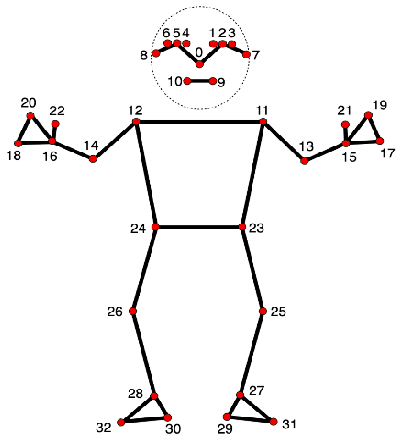

----------------------------------------------------------------------

🧩  Feature Extraction Function for All Videos

We’ll extract pose landmarks (x, y, z, visibility) for each frame, then merge them with emotion annotations (valence/arousal).

In [ ]:
import tqdm

def extract_features_from_video(video_path, rating_path, sample_rate=10):
    """
    Extract pose landmarks + emotion values from a single video.
    - sample_rate: process every Nth frame to speed up extraction
    """
    cap = cv2.VideoCapture(video_path)
    ratings = pd.read_csv(rating_path)
    fps = cap.get(cv2.CAP_PROP_FPS)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    features = []
    frame_idx = 0

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        if frame_idx % sample_rate == 0:
            results = extract_pose(frame)
            if results.pose_landmarks:
                row = []
                for lm in results.pose_landmarks.landmark:
                    row.extend([lm.x, lm.y, lm.z, lm.visibility])

                # Add valence/arousal values
                if frame_idx < len(ratings):
                    val = ratings.loc[frame_idx, 'valence'] if 'valence' in ratings else np.nan
                    aro = ratings.loc[frame_idx, 'arousal'] if 'arousal' in ratings else np.nan
                else:
                    val, aro = np.nan, np.nan

                row.extend([val, aro])
                features.append(row)

        frame_idx += 1

    cap.release()

    # Create dataframe
    landmark_cols = [f"{axis}_{i}" for i in range(33) for axis in ['x', 'y', 'z', 'vis']]
    df = pd.DataFrame(features, columns=landmark_cols + ['valence', 'arousal'])
    return df


Process All Video–Rating Pairs

In [ ]:
output_csv_dir = "/content/features_csv"
os.makedirs(output_csv_dir, exist_ok=True)

all_feature_paths = []

for vid, rate in tqdm.tqdm(matches, desc="Extracting all features"):
    video_path = os.path.join(video_dir, vid)
    rating_path = os.path.join(rating_dir, rate)

    try:
        df_features = extract_features_from_video(video_path, rating_path, sample_rate=10)
        save_path = os.path.join(output_csv_dir, f"{os.path.splitext(vid)[0]}_features.csv")
        df_features.to_csv(save_path, index=False)
        all_feature_paths.append(save_path)
    except Exception as e:
        print(f"❌ Error processing {vid}: {e}")

print(f"\n✅ Saved features for {len(all_feature_paths)} videos in {output_csv_dir}")
print("📦 Sample saved file:", all_feature_paths[:3])


Extracting all features: 100%|██████████| 124/124 [45:41<00:00, 22.10s/it]


✅ Saved features for 124 videos in /content/features_csv
📦 Sample saved file: ['/content/features_csv/52_features.csv', '/content/features_csv/20_features.csv', '/content/features_csv/54_features.csv']


🧠  Combine All Features into One Dataset

Let’s merge all the extracted CSVs into one global DataFrame to use later for model training or LLM/NLP reasoning




In [ ]:
import glob

csv_files = glob.glob(os.path.join(output_csv_dir, "*.csv"))
print(f"📊 Found {len(csv_files)} feature CSV files.")

all_data = []
for file in csv_files:
    df = pd.read_csv(file)
    df['video_id'] = os.path.basename(file).replace("_features.csv", "")
    all_data.append(df)

df_all = pd.concat(all_data, ignore_index=True)
print("✅ Combined dataset shape:", df_all.shape)
df_all.head()


📊 Found 124 feature CSV files.
✅ Combined dataset shape: (20838, 135)


,x_0,y_0,z_0,vis_0,x_1,y_1,z_1,vis_1,x_2,y_2,...,y_31,z_31,vis_31,x_32,y_32,z_32,vis_32,valence,arousal,video_id
0,0.408414,0.539313,0.007355,0.998324,0.409541,0.543411,0.003608,0.998358,0.409445,0.544313,...,0.342018,0.037960,0.913903,0.356942,0.333808,0.059818,0.571860,NaN,NaN,55
1,0.645497,0.464137,-0.599259,0.997906,0.648463,0.450400,-0.614624,0.997515,0.651311,0.450205,...,0.509669,0.583108,0.098459,0.594292,0.498924,0.435351,0.174437,NaN,NaN,55
2,0.645310,0.435042,-0.537506,0.999903,0.645936,0.427878,-0.541782,0.999936,0.647359,0.428312,...,0.631293,-0.230493,0.246536,0.636998,0.657710,-0.291722,0.477723,NaN,NaN,55
3,0.631560,0.520894,-0.584044,0.999330,0.638934,0.518813,-0.595929,0.999390,0.643239,0.520742,...,0.520506,0.545497,0.215943,0.579173,0.465584,0.516097,0.187936,NaN,NaN,55
4,0.626765,0.550526,-0.677637,0.954170,0.635234,0.533640,-0.700971,0.975016,0.639835,0.531045,...,0.482068,0.855918,0.052336,0.604148,0.564834,0.824694,0.068473,NaN,NaN,55
